# TSA_HW08
R10A21126  
WANG YIFAN


## Q2

Recall the dataset “robot” firstly introduced in TSA HW06.


In [1]:
library(TSA)
library('lmtest')
# require(grDevices)

Warning message:
"package 'TSA' was built under R version 4.2.2"

Attaching package: 'TSA'


The following objects are masked from 'package:stats':

    acf, arima


The following object is masked from 'package:utils':

    tar


Warning message:
"package 'lmtest' was built under R version 4.2.2"
Loading required package: zoo

Warning message:
"package 'zoo' was built under R version 4.2.2"

Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




In [2]:
options(repr.plot.width=15, repr.plot.height=5) # modify the plot size

### (a) Use IMA(1, 1) to forecast five values ahead and calculate the 95% confidence intervals.


### (b) Display the actual values, the five forecasts and the 95% confidence intervals of the five forecasts, all in one graph. What do you observe?

In [3]:
data(robot)

In [4]:
model = arima(robot,order=c(0,1,1)) 
model



Call:
arima(x = robot, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.8713
s.e.   0.0389

sigma^2 estimated as 6.069e-06:  log likelihood = 1480.95,  aic = -2959.9

A Time Series:
[1] 0.001742672 0.001742672 0.001742672 0.001742672 0.001742672

A Time Series:
[1] -0.003086000 -0.003125839 -0.003165355 -0.003204555 -0.003243446

A Time Series:
[1] 0.006571344 0.006611183 0.006650699 0.006689898 0.006728790

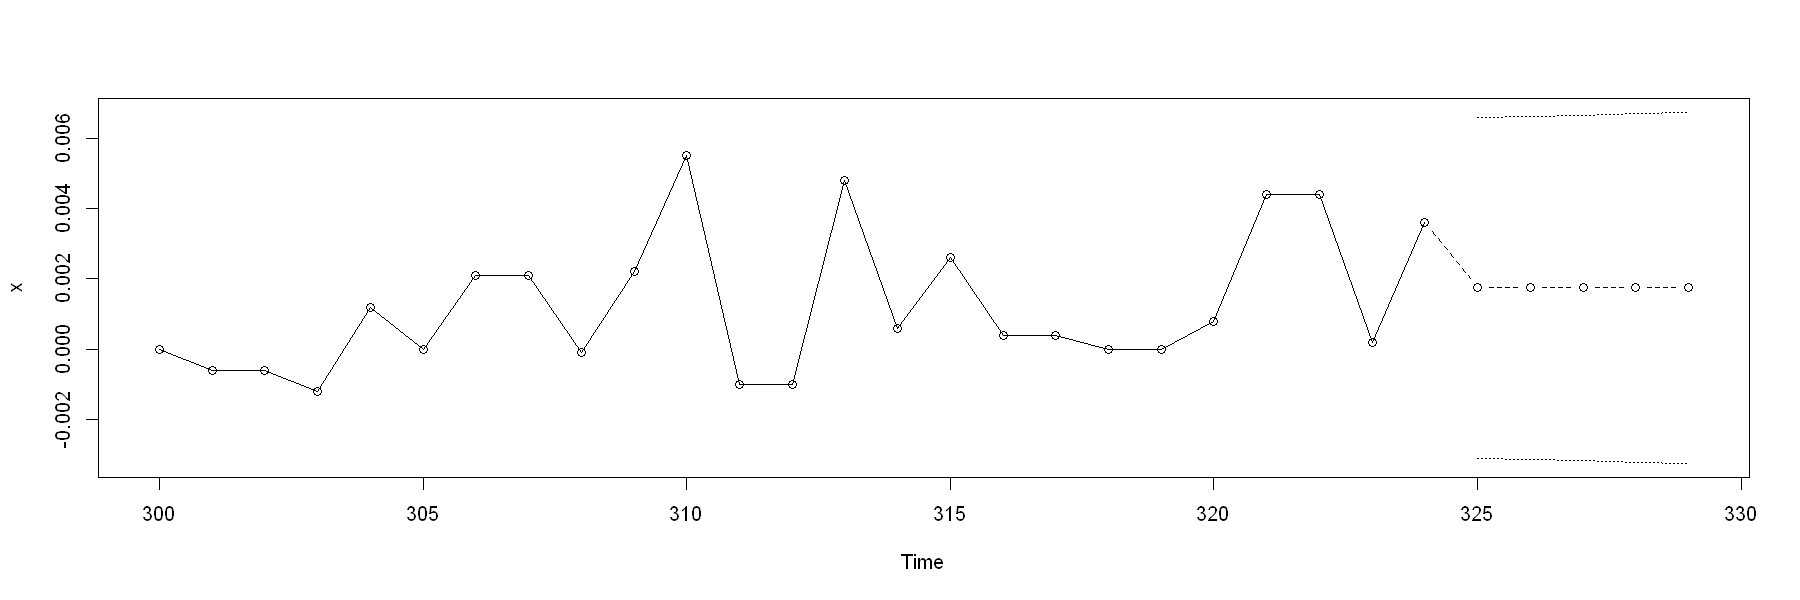

In [5]:
plot(model,n.ahead=5,n1=c(300))$pred
plot(model,n.ahead=5,n1=300)$lpi;
plot(model,n.ahead=5,n1=300)$upi; 
# n1 starting time point of the plot (default=earliest time point)
# pred the time series of predicted values
# lpi the corresponding lower 95% prediction limits
# upi the corresponding upper 95% prediction limits
#https://cran.r-project.org/web/packages/TSA/TSA.pdf P.45

The forecast limits are quite wide in this fitted model and the forecasts are relatively constant.

### (c) Use ARMA(1, 1) to forecast five values ahead and calculate the 95% confidence intervals. Compare the 
results with those in (a), what do you observe?

A Time Series:
[1] 0.001901348 0.001879444 0.001858695 0.001839041 0.001820424

A Time Series:
[1] -0.002878776 -0.002947994 -0.003010803 -0.003067889 -0.003119851

A Time Series:
[1] 0.006681473 0.006706881 0.006728193 0.006745972 0.006760700

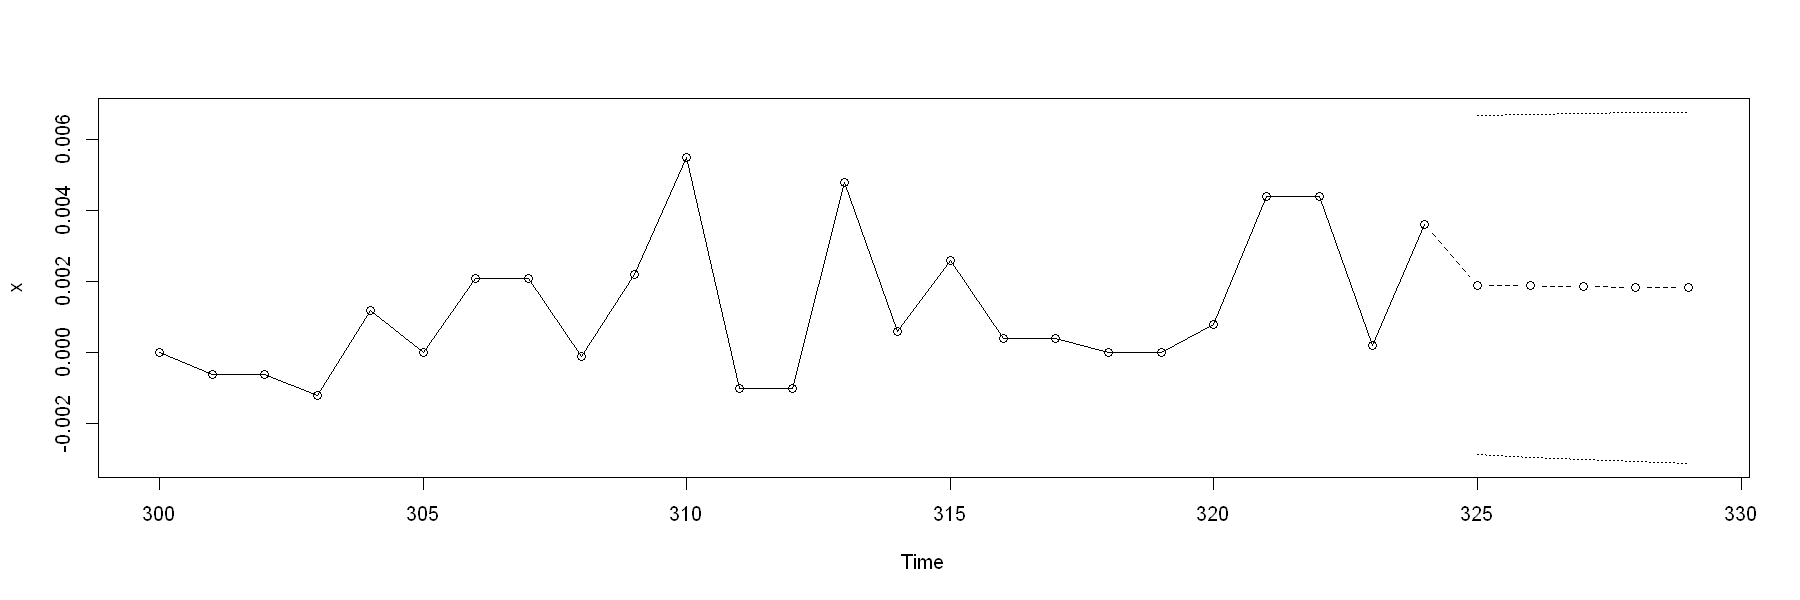

In [6]:
model=arima(robot,order=c(1,0,1))
plot(model,n.ahead=5,n1=c(300))$pred
plot(model,n.ahead=5,n1=300)$lpi;
plot(model,n.ahead=5,n1=300)$upi;

Two models give quite similar forecasts.

## Q3

The dataset “boardings” contains the monthly number of passengers who boarded light rail trains and 
buses in Denver, Colorado, from August 2000 to March 2006.


### (a) Plot the time series and tell your observation if there exists seasonality and if the series is stationary. 


In [7]:
data(boardings); series=boardings[,1]

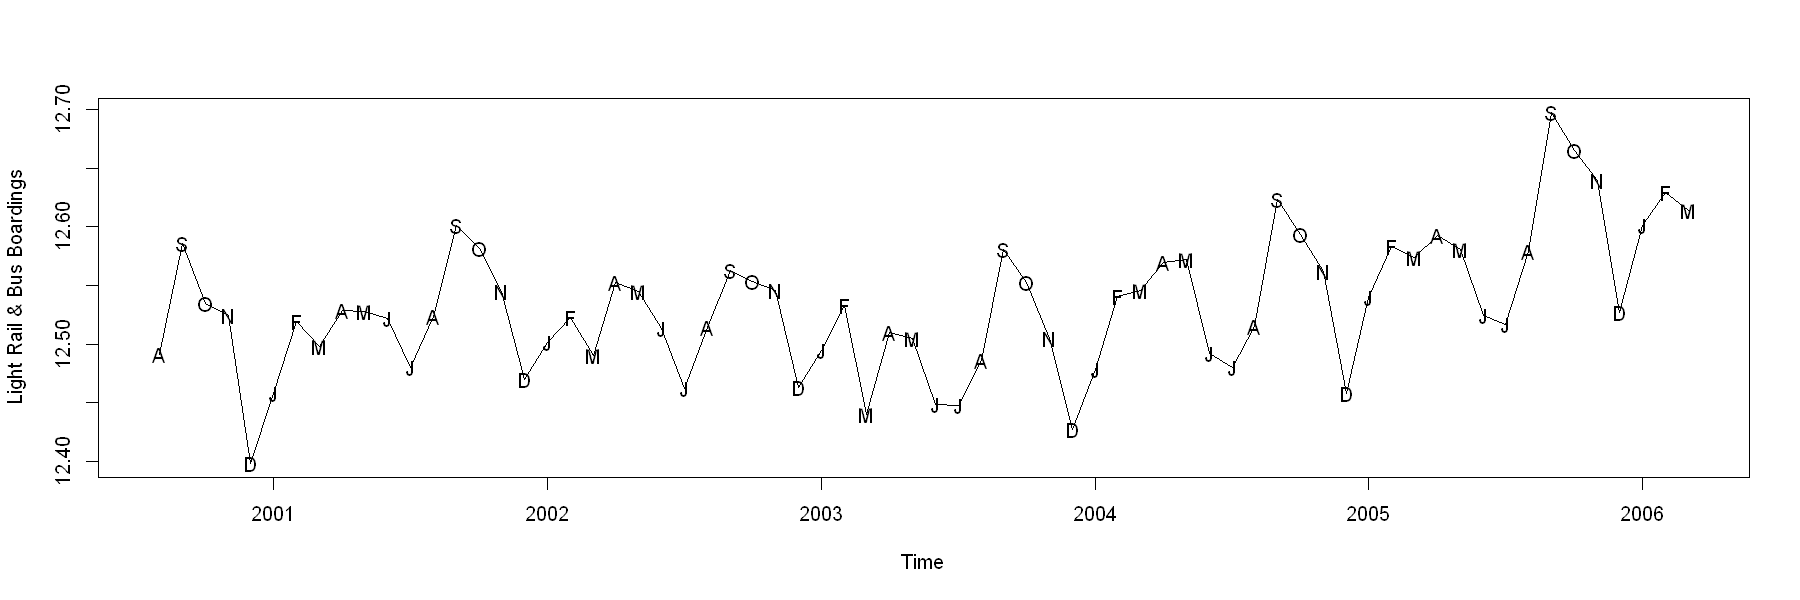

In [8]:
plot(series,type='l',ylab='Light Rail & Bus Boardings')
points(series,x=time(series),pch=as.vector(season(series)))

There is substantial seasonality in this series. Decembers are generaly low due to the holidays
and Septembers are usually quite high due to the start up of school. There may also be a gradual upward “trend” that
may need to be modeled with some kind of nonstationarity.

### (b) Plot the sample ACF and see what are the significant lags?


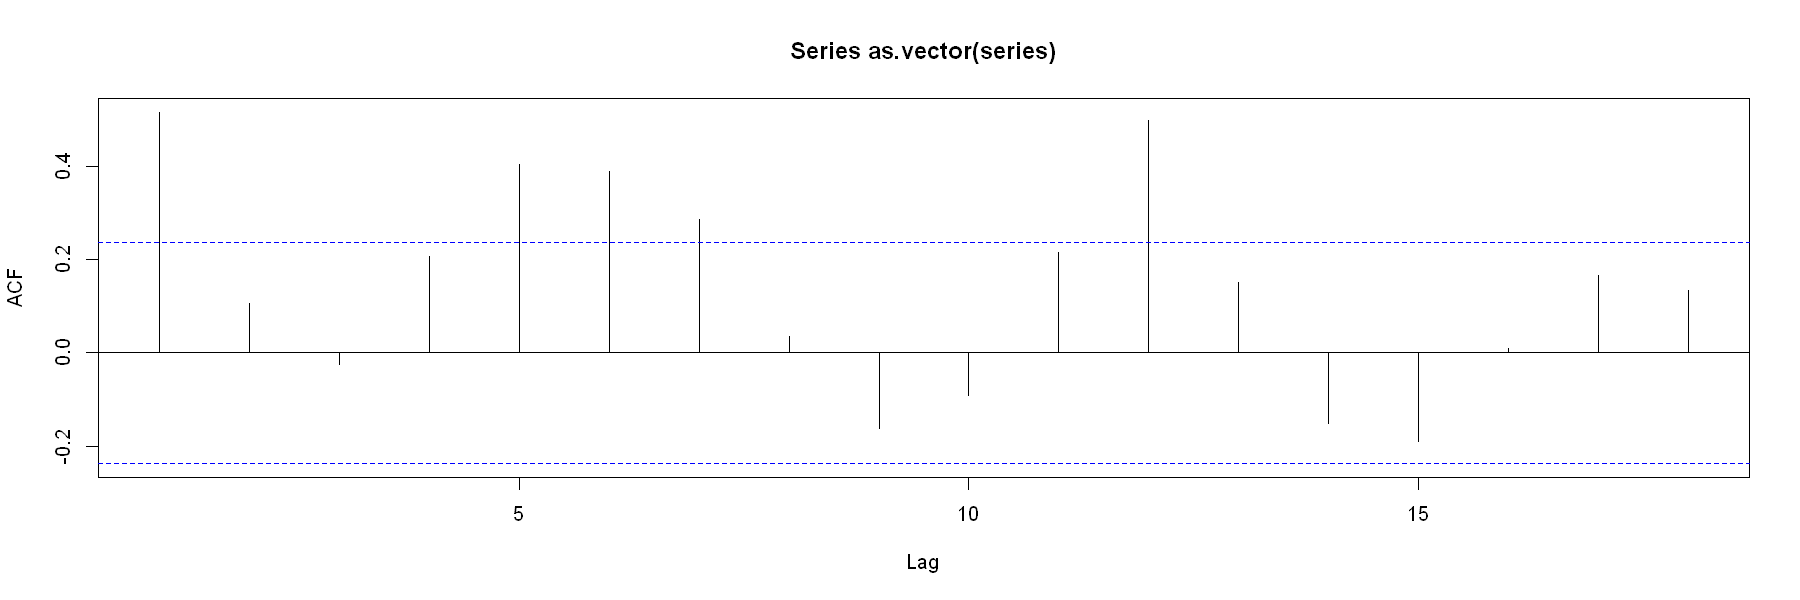

In [9]:
acf(as.vector(series))

The significant autocorrelations indicate a seasonal ARMA model.

### (c) Fit the data with ARMA $(0, 3) \times (1,0)_{12}$, evaluate if the estimated coefficients $\left\{\hat{\theta}_1,\hat{\theta}_12,\hat{\theta}_3,\hat{\phi}_{12},\right\}$ are significant. 


Hint: you need to check the associated standard errors “s.e.” to the estimated coefficients to know if the 
coefficients are significant, via hypothesis testing.


In [10]:
model=arima(series,order=c(0,0,3),seasonal=list(order=c(1,0,0),period=12))
model


Call:
arima(x = series, order = c(0, 0, 3), seasonal = list(order = c(1, 0, 0), period = 12))

Coefficients:
         ma1     ma2     ma3    sar1  intercept
      0.7290  0.6116  0.2950  0.8776    12.5455
s.e.  0.1186  0.1172  0.1118  0.0507     0.0354

sigma^2 estimated as 0.0006542:  log likelihood = 143.54,  aic = -277.09

In [11]:
coeftest(model);coefci(model);confint(model) #identical results


z test of coefficients:

          Estimate Std. Error  z value  Pr(>|z|)    
ma1        0.72897    0.11856   6.1487 7.812e-10 ***
ma2        0.61162    0.11718   5.2194 1.795e-07 ***
ma3        0.29503    0.11180   2.6390  0.008316 ** 
sar1       0.87761    0.05071  17.3064 < 2.2e-16 ***
intercept 12.54550    0.03543 354.0930 < 2.2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


,2.5 %,97.5 %
ma1,0.49660242,0.9613358
ma2,0.38194697,0.8412979
ma3,0.07591171,0.5141480
sar1,0.77822267,0.9770035
intercept,12.47605729,12.6149402


,2.5 %,97.5 %
ma1,0.49660242,0.9613358
ma2,0.38194697,0.8412979
ma3,0.07591171,0.5141480
sar1,0.77822267,0.9770035
intercept,12.47605729,12.6149402


All of these coefficients are statistically significant at the usual significance levels.

## Q4

The monthly airline passengers, first investigated by Box and Jenkins in 1976, is considered as the 
classic time series dataset (see “TSA HW08.airpass.csv”).


### (a) Plot the time series in its original scale and the log-transformed scale. Do you think making the log-transformation is appropriate?


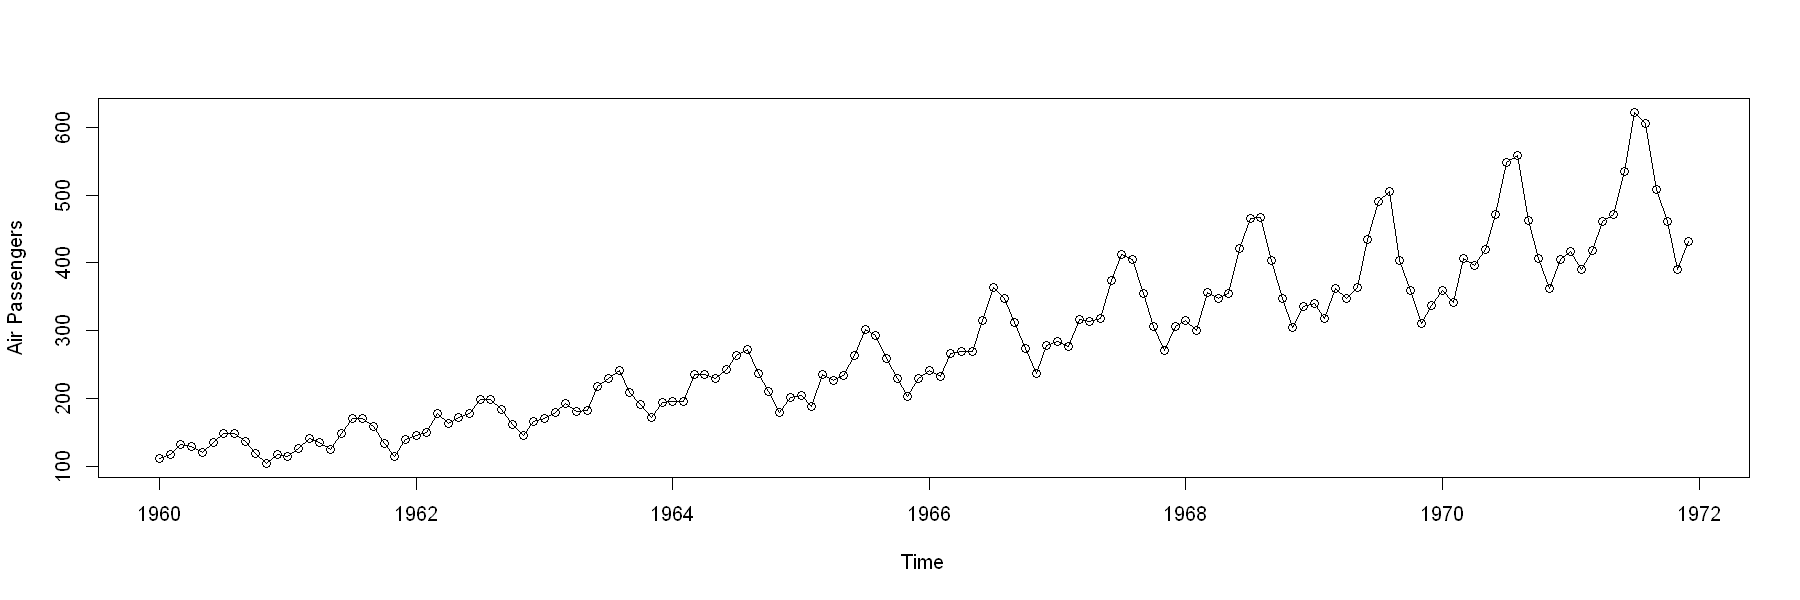

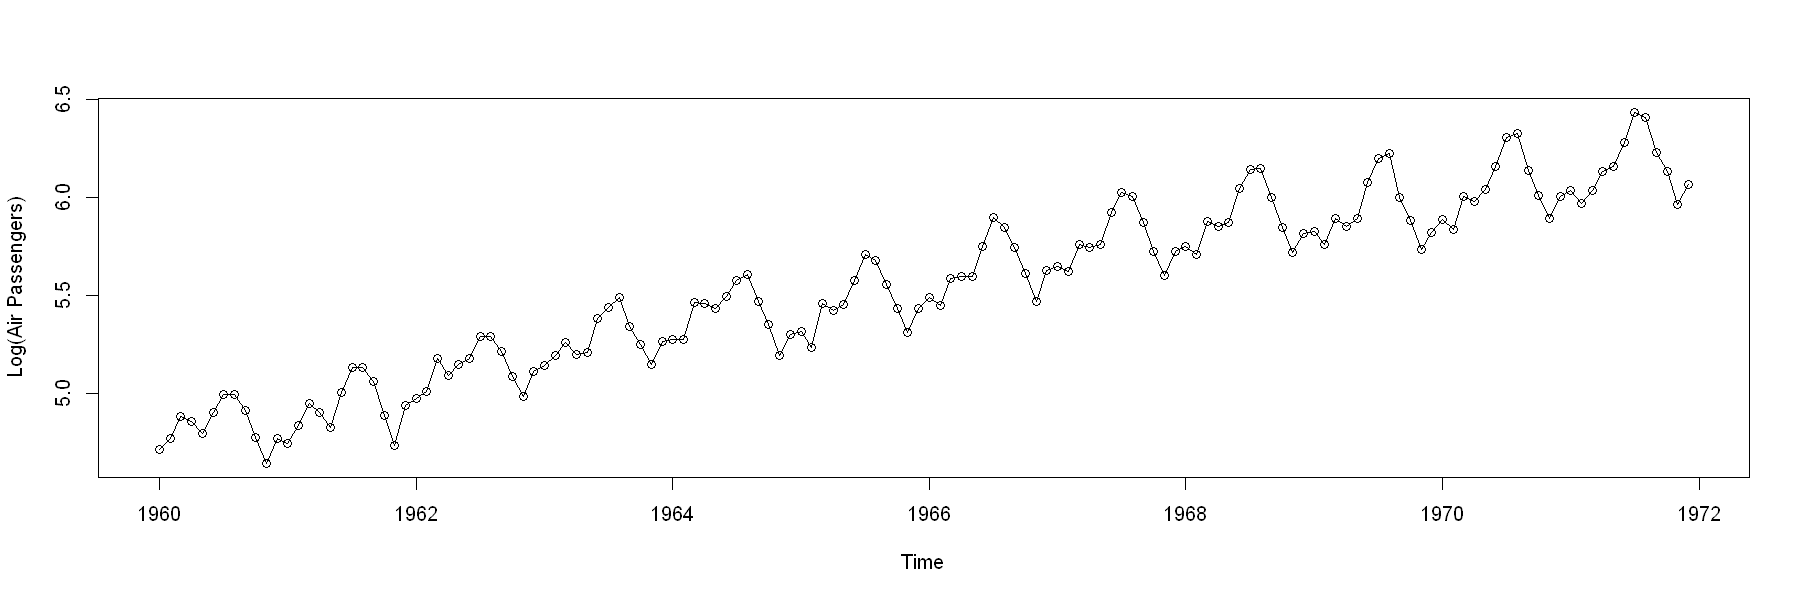

In [12]:
data(airpass) 
plot(airpass, type='o',ylab='Air Passengers')
plot(log(airpass), type='o',ylab='Log(Air Passengers)')

The graph of the logarithms displays a much more constant variation around the upward “trend.”

### (b) Make the first-order difference over the “log-transformed” data. What do you observe?


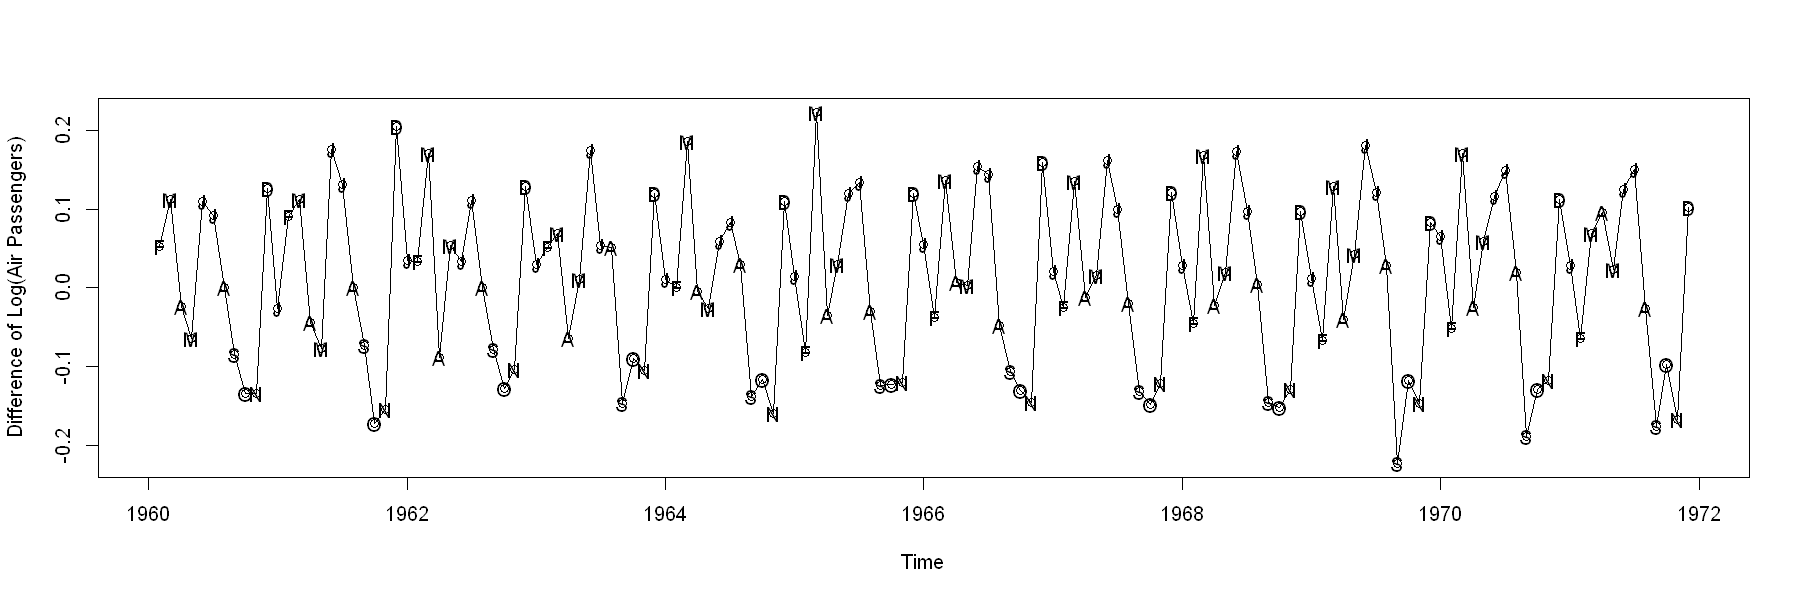

In [13]:
plot(diff(log(airpass)),type='o',ylab='Difference of Log(Air Passengers)')
points(diff(log(airpass)),x=time(diff(log(airpass))), 
pch=as.vector(season(diff(log(airpass)))))

This series appears to be stationary.

The seasonality can be observed by looking at the plotting symbols carefully. Septembers, Octobers, and Novembers are mostly at the low points and Decembers mostly at the high points.

### (c) Make a **seasonal** difference of the resulted series in (b), what do you observe?


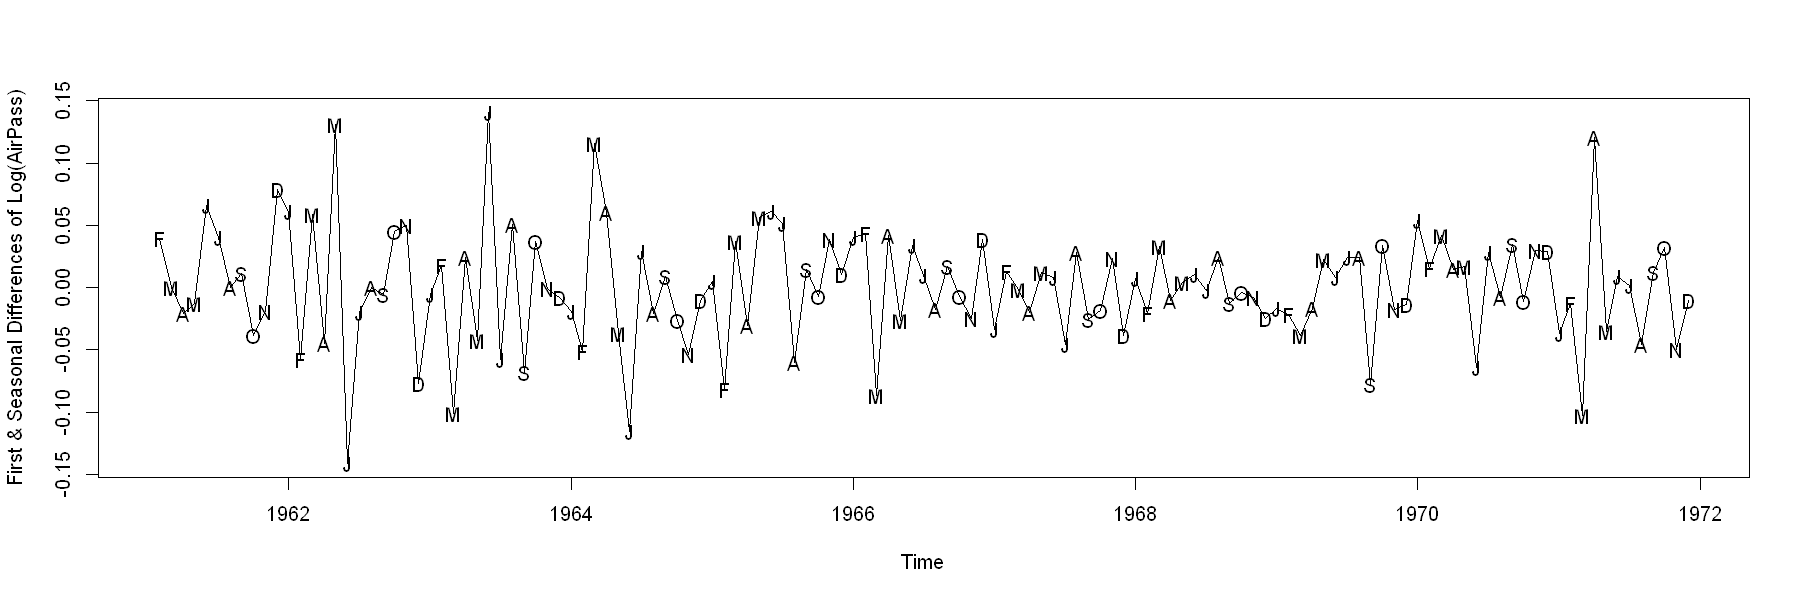

In [14]:
plot(diff(diff(log(airpass)),lag=12),type='l',
ylab='First & Seasonal Differences of Log(AirPass)')
points(diff(diff(log(airpass)),lag=12),x=time(diff(diff(log(airpass)),lag=12)), pch=as.vector(season(diff(diff(log(airpass)),lag=12))))

The seasonality is much less obvious now

### (d) Plot the sample ACF of the resulted series in (c), explain what you see.


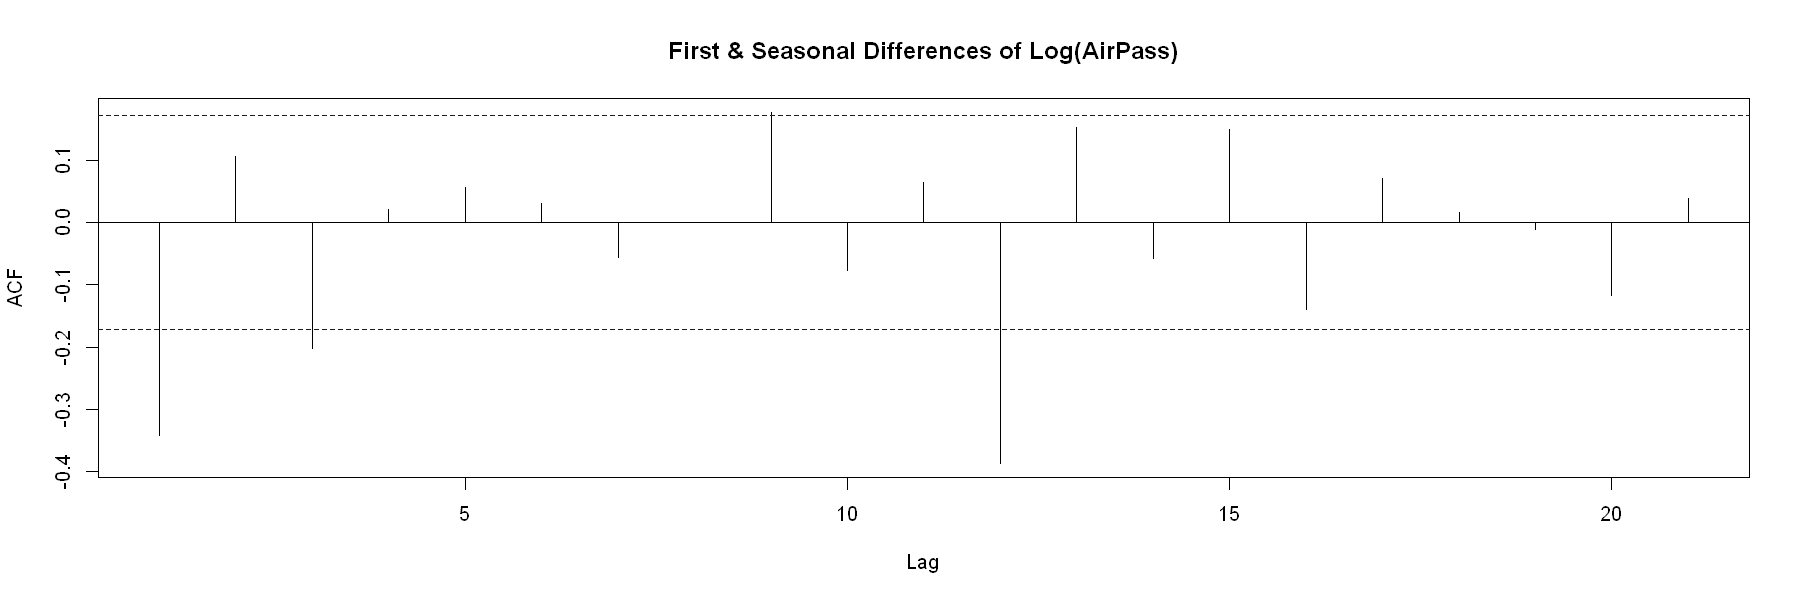

In [15]:
acf(as.vector(diff(diff(log(airpass)),lag=12)),
# ci.type='ma',
main='First & Seasonal Differences of Log(AirPass)')

Although there is a “significant” autocorrelation at lag 3, the most prominent autocorrelations are at lags 1 and 12.

### (e) Fit an ARIMA $(0,1,1) × (0,1,1)_{12}$ model to the log-transformed series. Diagnose the residuals of this model, including the sample ACF and the normality test.


In [16]:
model=arima(log(airpass),order=c(0,1,1),seasonal=list(order=c(0,1,1),period=12))
model


Call:
arima(x = log(airpass), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 
    1), period = 12))

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001348:  log likelihood = 244.7,  aic = -485.4

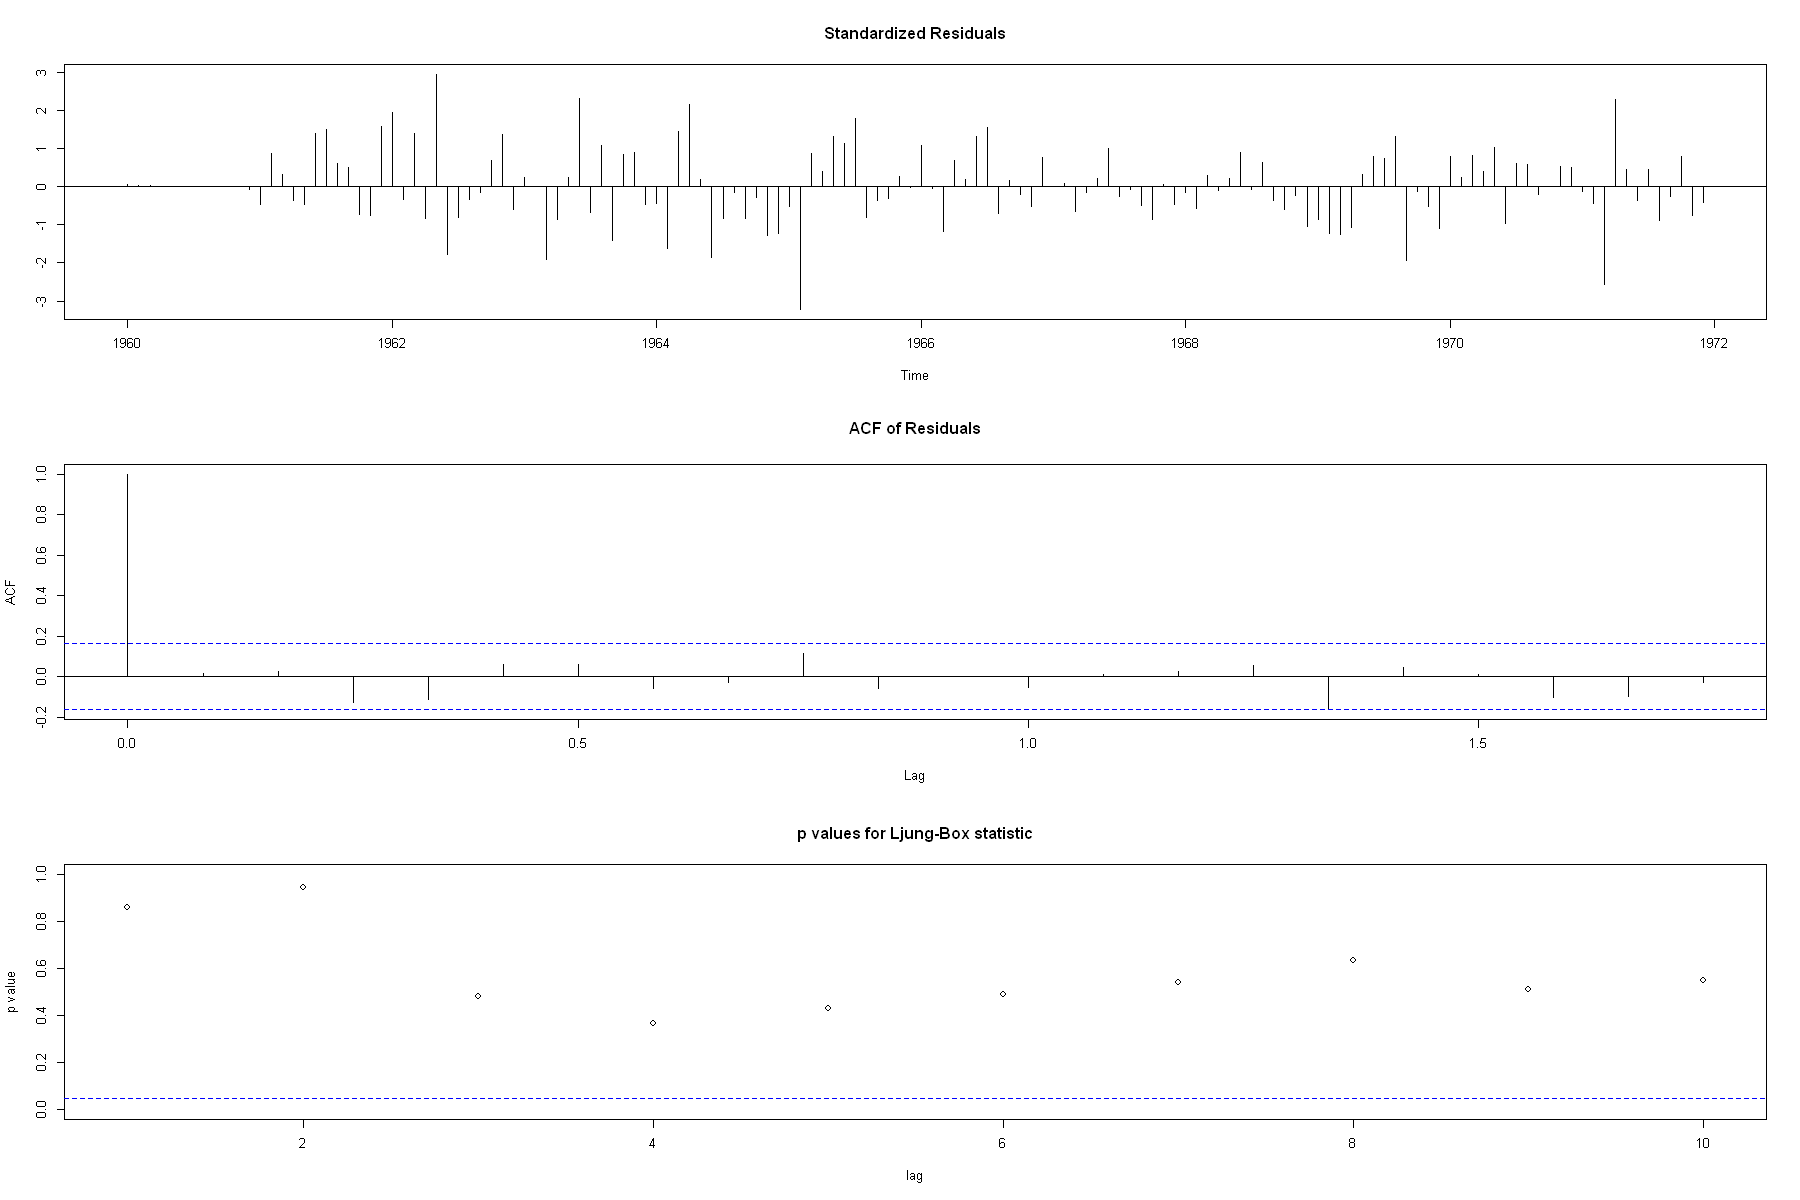

In [17]:
options(repr.plot.width=15, repr.plot.height=10) # modify the plot size
tsdiag(model)

For residuals:

There is no significant autocorrelation. 
The hypothesis of randomness is not rejected.

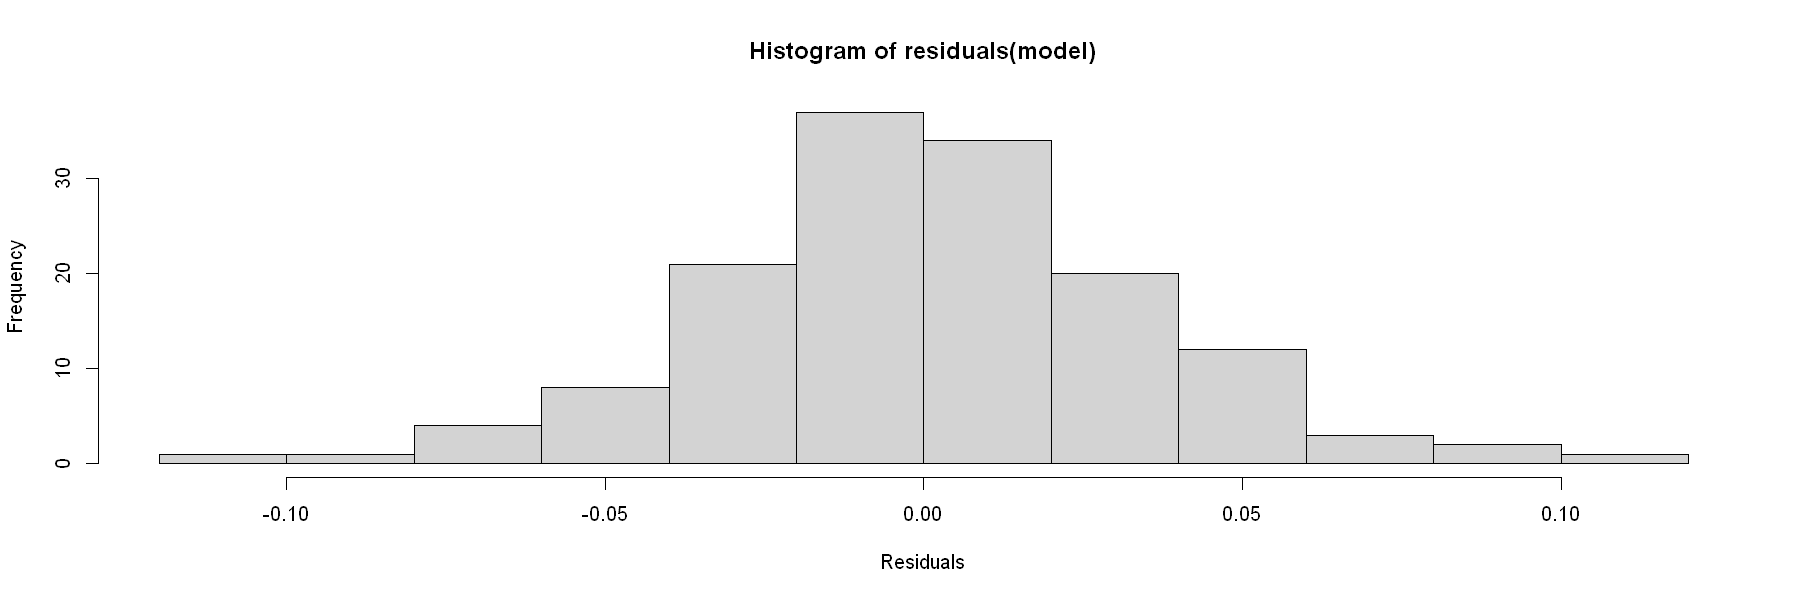

In [18]:
options(repr.plot.width=15, repr.plot.height=5)
hist(residuals(model),xlab='Residuals')


In [19]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.98637, p-value = 0.1674


The Shapiro-Wilk test does not reject normality of the error terms at any of the usual significance levels.

### (f) Make forecasts for “two” years based on the model in (e). The confidence intervals shall be included

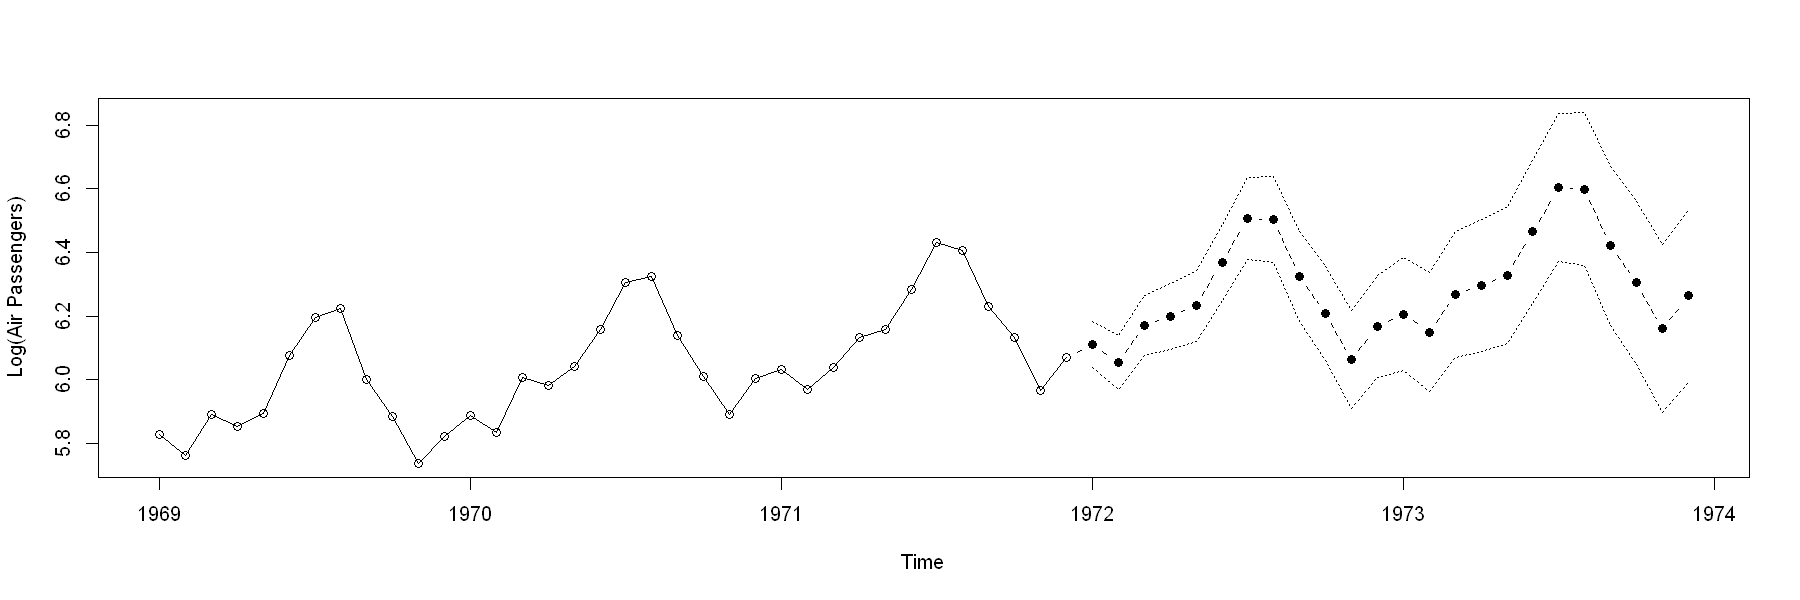

In [20]:
plot(model,n1=c(1969,1),n.ahead=24,pch=19,ylab='Log(Air Passengers)')

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1972,450.4224,425.7172,479.0068,492.4045,509.0550,583.3449,670.0108,667.0776,558.1894,497.2078,429.8720,477.2426
1973,495.9301,468.7289,527.4025,542.1538,560.4865,642.2823,737.7043,734.4748,614.5852,547.4424,473.3034,525.4600


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1972,419.1476,391.4747,435.9193,443.9352,455.0234,517.2870,589.7133,582.9999,484.5733,428.8781,368.5266,406.7287
1973,415.6605,388.7165,433.0060,440.8856,451.6518,513.0512,584.3271,577.0553,479.0764,423.4948,363.4393,400.5920


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1972,484.0307,462.9550,526.3533,546.1657,569.5025,657.8385,761.2418,763.2807,642.9890,576.4238,501.4290,559.9813
1973,591.7008,565.2108,642.3779,666.6825,695.5472,804.0651,931.3407,934.8380,788.4231,707.6668,616.3785,689.2506


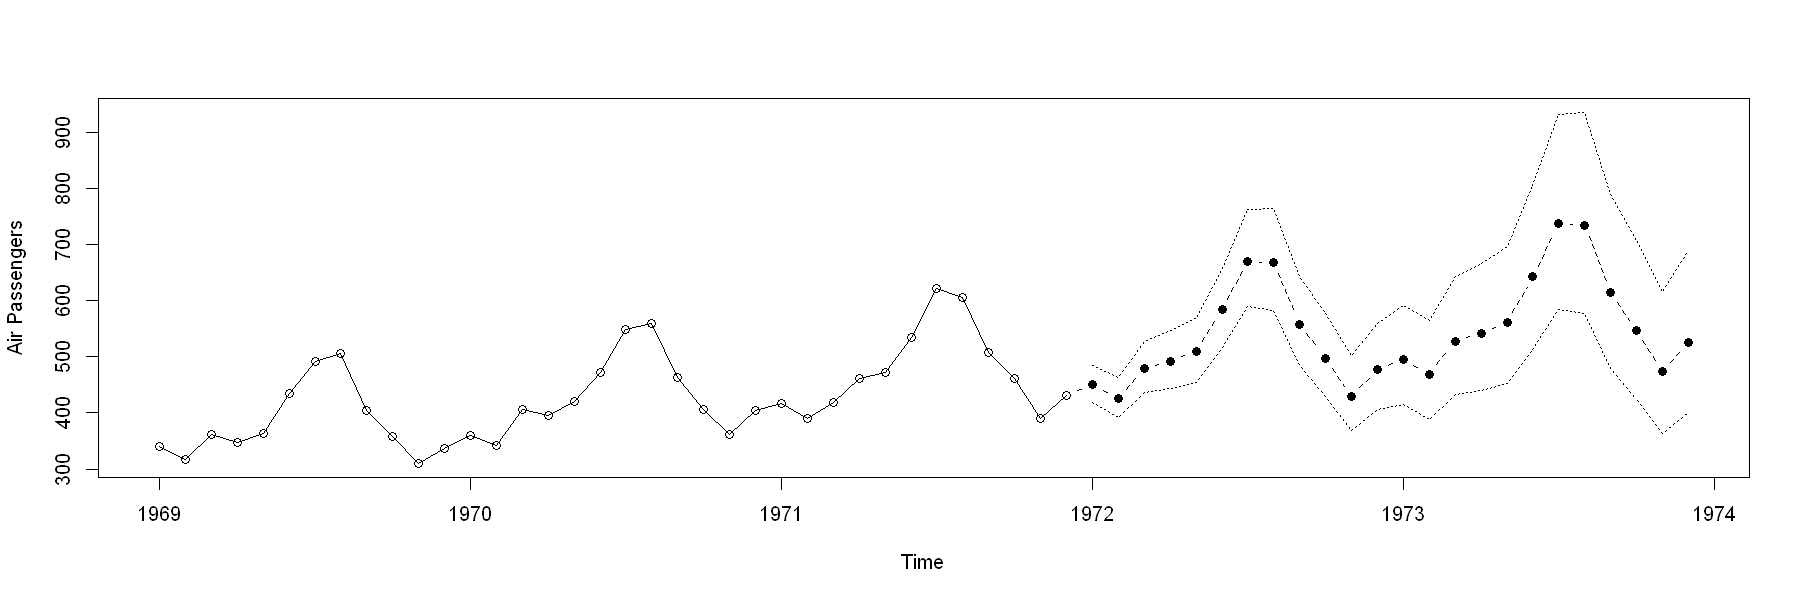

In [21]:
plot(model,n1=c(1969,1),n.ahead=24,pch=19,ylab='Air Passengers',transform=exp)$pred # plot in orginal terms
plot(model,n1=c(1969,1),n.ahead=24,pch=19,ylab='Air Passengers',transform=exp)$lpi # lower bound
plot(model,n1=c(1969,1),n.ahead=24,pch=19,ylab='Air Passengers',transform=exp)$upi # upper bound

In [22]:
# pred = data.frame(plot(model,n1=c(1969,1),n.ahead=24,pch=19,ylab='Air Passengers',transform=exp)$pred,
# plot(model,n1=c(1969,1),n.ahead=24,pch=19,ylab='Air Passengers',transform=exp)$lpi,
# plot(model,n1=c(1969,1),n.ahead=24,pch=19,ylab='Air Passengers',transform=exp)$upi)
# colnames(pred)=c('point','lpi','upi')
# pred